<a href="https://colab.research.google.com/github/Stella-kimani/Stella/blob/master/Stl_Moringa_Data_Science_W2_Core_Independent_Project_Stella_Kimani_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a)Defining the Question

Determine the financial inclusion in Africa by predicting which individuals are most likely to have or use a bank account.

b) Defining the Metric for Success

The Success will be determined by coming up with solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

c) Understanding the context

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account. Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

 Importing the libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline
import pandas_profiling as pp


In [21]:
#Load Dataset
sns.set_style()
FIN_df = pd.read_csv("http://bit.ly/FinancialDataset")
FIN_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Checking Dataset
#Determining the no. of records in our dataset
FIN_df.shape

(23524, 13)

In [7]:
# Understand the dataset
FIN_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [8]:
#Previewing the top of our dataset
#
FIN_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [9]:
#Previewing the bottom of our dataset
# 
FIN_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [10]:
# Checking whether each column has an appropriate datatype
#
FIN_df.dtypes


country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

External Data Source Validation

Making sure data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

Tidying Dataset

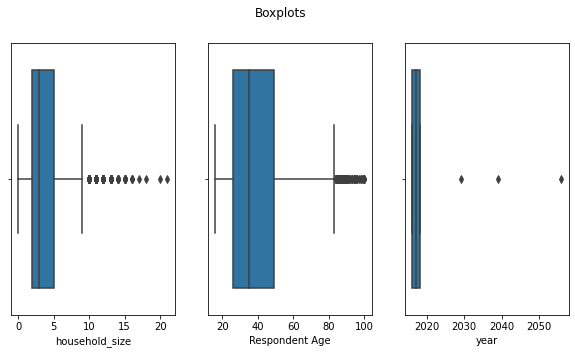

In [11]:
# Checking for Outliers
#
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(10, 5))
fig.suptitle('Boxplots')
sns.boxplot(FI_df['household_size'], ax=ax1)
sns.boxplot(FI_df['Respondent Age'], ax=ax2)
sns.boxplot(FI_df['year'], ax=ax3)

plt.show()

In [22]:
#Dropping the outliers in year column
outliers = FIN_df[FIN_df['year']>2020].index

FIN_df.drop(outliers, inplace=True)
FIN_df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [23]:
#check for outliers in the the Respondent age column columns use IQR formulae
q1_age = FIN_df["Respondent Age"].quantile(0.25)
q3_age = FIN_df["Respondent Age"].quantile(0.75)

IQR = q3_age - q1_age

outliers = ((FIN_df["Respondent Age"] < q1_age - 1.5 * IQR) | (FIN_df["Respondent Age"] > q3_age + 1.5 * IQR))
outliers.value_counts()


False    23280
True       241
Name: Respondent Age, dtype: int64

In [24]:
#check for anomalies in the the household size column columns use IQR formulae
#  
q1_house = FIN_df["household_size"].quantile(0.25)
q3_house = FIN_df["household_size"].quantile(0.75)

IQR = q3_house - q1_house

outliers = ((FIN_df["household_size"] < q1_house - 1.5 * IQR) | (FIN_df["household_size"] > q3_house + 1.5 * IQR))
outliers.value_counts()

False    23144
True       377
Name: household_size, dtype: int64

In [26]:
# Dropping outliers 
Q1 = FIN_df.quantile(0.25)
Q3 = FIN_df.quantile(0.75)
IQR = Q3 - Q1
FIN_df_out = FIN_df[~((FIN_df < (Q1 - 1.5 * IQR)) | (FIN_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(FIN_df_out)
print(FIN_df_out)

      country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23518  Uganda  2018  ...                Primary education                  No Income
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education        

In [27]:
# checking for null values 
FIN_df.isnull().sum()


country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [28]:
#Dropping missing values
FIN_df = FIN_df.dropna()


In [29]:
# Drop column unique ID
FIN_df = FIN_df.drop(columns = ['uniqueid'])

In [30]:
FIN_df.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [31]:
# Renaming columns with spaces
FIN_df.columns = FIN_df.columns.str.lower().str.replace(' ', '_')
FIN_df.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [32]:
#checking the data types
FIN_df.dtypes

country                    object
year                        int64
has_a_bank_account         object
type_of_location           object
cell_phone_access          object
household_size            float64
respondent_age            float64
gender_of_respondent       object
the_relathip_with_head     object
marital_status             object
level_of_educuation        object
type_of_job                object
dtype: object

In [33]:
#Univariate and Bivariate analysis
# Calculate mean,standard deviation ,Skewness, Kurtosis of the household size and Respondent age columns
mean_1 = FIN_df.groupby('country').household_size.mean()
print(mean_1)
mean_2 = FIN_df.groupby('country').respondent_age.mean()
print(mean_2)


country
Kenya       3.987133
Rwanda      4.482782
Tanzania    1.931692
Uganda      4.983771
Name: household_size, dtype: float64
country
Kenya       39.624051
Rwanda      39.278360
Tanzania    38.482462
Uganda      35.496897
Name: respondent_age, dtype: float64


In [34]:
#calculate std deviation of the 2 columns and display by country
std1 = FIN_df.groupby('country').household_size.std()
std2 = FIN_df.groupby('country').respondent_age.std()
print(std1)
print(std2)

country
Kenya       2.334967
Rwanda      1.980386
Tanzania    1.055155
Uganda      2.893811
Name: household_size, dtype: float64
country
Kenya       17.215858
Rwanda      16.262093
Tanzania    16.441895
Uganda      15.304233
Name: respondent_age, dtype: float64


In [36]:
#Calculate median ie household_size and respondents age of each country
 
median = FIN_df.groupby('country').household_size.median()
median_1 = FIN_df.groupby('country').respondent_age.median()
print(median)
print(median_1)
#The country with highest household size median is Uganda
#The country with highest age in terms of respondents median is Kenya,Rwanda and Tz.

country
Kenya       4.0
Rwanda      4.0
Tanzania    2.0
Uganda      5.0
Name: household_size, dtype: float64
country
Kenya       35.0
Rwanda      35.0
Tanzania    35.0
Uganda      31.0
Name: respondent_age, dtype: float64


In [38]:
#Find the Range in the Household_size amd respondents_age columns
max = FIN_df.household_size.max()
min = FIN_df.household_size.min()
Range_1 = max - min
print(Range_1)

max_R = FIN_df.respondent_age.max()
min_R = FIN_df.respondent_age.min()

Range_2 = max_R - min_R
print(Range_2)

21.0
84.0


In [39]:
#Counting the values
count_a = FIN_df.groupby('country').household_size.count()
count_b = FIN_df.groupby('country').respondent_age.count()
print(count_a)
print(count_b)

country
Kenya       6062
Rwanda      8683
Tanzania    6500
Uganda      2095
Name: household_size, dtype: int64
country
Kenya       6062
Rwanda      8683
Tanzania    6500
Uganda      2095
Name: respondent_age, dtype: int64


In [40]:
#Interquartile range
print(FIN_df.groupby('country').household_size.quantile([0.25,0.5,0.75]))
print(FIN_df.groupby('country').respondent_age.quantile([0.25,0.5,0.75]))

country       
Kenya     0.25    2.0
          0.50    4.0
          0.75    5.0
Rwanda    0.25    3.0
          0.50    4.0
          0.75    6.0
Tanzania  0.25    1.0
          0.50    2.0
          0.75    2.0
Uganda    0.25    3.0
          0.50    5.0
          0.75    7.0
Name: household_size, dtype: float64
country       
Kenya     0.25    26.0
          0.50    35.0
          0.75    50.0
Rwanda    0.25    27.0
          0.50    35.0
          0.75    49.0
Tanzania  0.25    26.0
          0.50    35.0
          0.75    48.0
Uganda    0.25    24.0
          0.50    31.0
          0.75    45.0
Name: respondent_age, dtype: float64


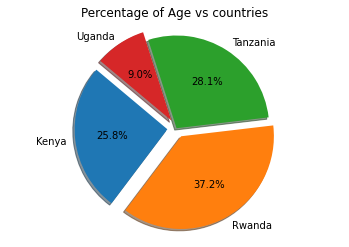

In [41]:
#Plot univariate summaries
#Create a pie chart to perform Univariate analysis
country = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
Age     = [6062, 8721, 6589, 2101]
explode = [0.1, 0.1, 0, 0.1]

plt.pie(Age, labels=country, explode=explode, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Percentage of Age vs countries')
plt.show()


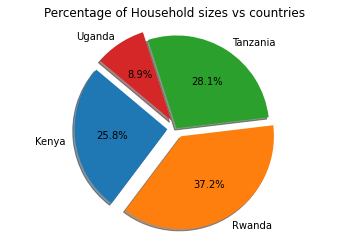

In [42]:
# Create a pie chart to show the Households
country   = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
Households = [6066, 8726, 6592, 2095]
explode = [0.1, 0.1, 0, 0.1]

plt.pie(Households, labels=country, explode=explode, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Percentage of Household sizes vs countries')
plt.show()

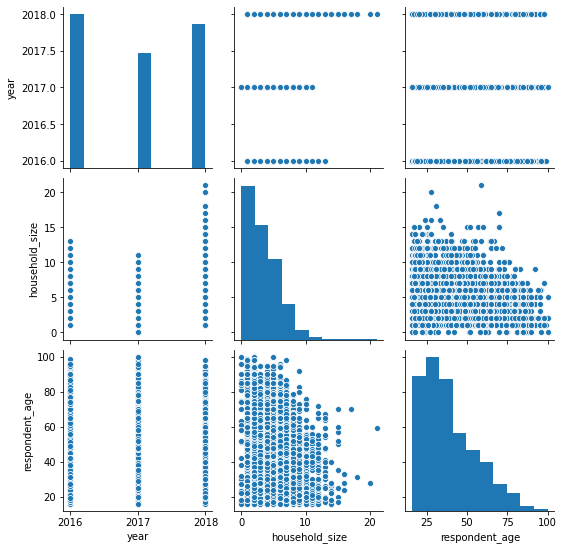

In [44]:
#Bivariate Analysis
#plot a bivariate summary of other observations
sns.pairplot(FIN_df)
plt.show()

In [45]:
#Preprocessing
!pip3 install factor_analyzer==0.2.3

In [46]:
#Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
x = FIN_df.drop('has_a_bank_account', 1)
y = FIN_df['has_a_bank_account']

In [47]:
# Encoding the categorical columns
x = pd.get_dummies(x)
x.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relathip_with_head_Child,the_relathip_with_head_Head of Household,the_relathip_with_head_Other non-relatives,the_relathip_with_head_Other relative,the_relathip_with_head_Parent,the_relathip_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_educuation_6,level_of_educuation_No formal education,level_of_educuation_Other/Dont know/RTA,level_of_educuation_Primary education,level_of_educuation_Secondary education,level_of_educuation_Tertiary education,level_of_educuation_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [49]:
#Factor analysis

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(x)
chi_square_value, p_value


(6932447.29492643, 0.0)

In [50]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(x)

/usr/local/lib/python3.6/dist-packages/factor_analyzer/factor_analyzer.py:50: RuntimeWarning: invalid value encountered in sqrt
  Is = np.sqrt(1 / np.diag(m))


In [51]:
#Choosing the number of factors to work with

from factor_analyzer.factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()

fa.analyze(x, 25, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,4.169358e+00
1,2.968327e+00
2,2.862829e+00
3,2.564288e+00
4,2.115497e+00
5,1.884866e+00
6,1.644995e+00
7,1.468952e+00
8,1.430573e+00
9,1.286953e+00


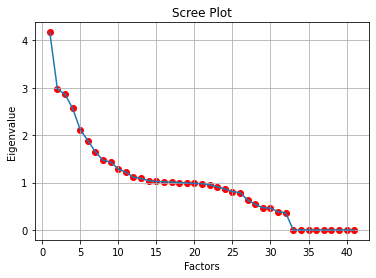

In [52]:
#Create a scree plot for each factor vs its eigen value

plt.scatter(range(1,x.shape[1]+1),ev, color= "Red")
plt.plot(range(1,x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [53]:
# Performing factor analysis
fa = FactorAnalyzer()
fa.analyze(x, 18, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18
year,-0.050551,0.023844,-0.020339,0.904136,-0.040069,0.059870,0.321792,-0.024845,0.027658,0.037303,0.079892,-0.039792,0.023136,0.010998,-0.188305,0.075856,0.122976,0.050740
household_size,0.174761,-0.031051,-0.156598,0.005393,0.010975,-0.042857,0.139015,0.019786,-0.051165,-0.050837,-0.029736,-0.017335,0.009167,0.002875,0.518910,0.033056,-0.030904,0.173936
respondent_age,0.022811,-0.036941,0.481537,0.014951,-0.314025,0.062934,-0.058340,0.193416,-0.184772,-0.061229,-0.029268,-0.085169,-0.005362,-0.080125,-0.057586,-0.099948,-0.005166,-0.174949
country_Kenya,0.032382,0.035740,0.008546,0.906113,-0.017757,-0.012515,-0.217207,-0.010490,-0.111874,0.055111,0.083912,-0.037145,-0.025645,0.009852,0.207976,0.128389,-0.124705,-0.028048
country_Rwanda,0.170066,0.006157,0.016090,-0.722667,0.004442,-0.109442,-0.200681,0.029878,-0.115346,-0.042055,-0.056680,0.038371,-0.010967,-0.011721,0.552755,-0.015704,-0.207950,-0.097698
country_Tanzania,-0.278271,-0.047456,0.000040,-0.132369,0.080291,0.125566,-0.156572,-0.017696,0.184832,0.025192,-0.029651,-0.005012,-0.020776,0.007027,-0.771183,-0.117557,0.218655,0.087263
country_Uganda,0.085151,0.025617,-0.046323,0.051773,-0.084697,0.011849,0.957272,-0.007533,0.058786,-0.044233,0.014041,0.004632,0.089275,-0.001242,0.056464,0.002839,0.205713,0.027114
type_of_location_Rural,0.962207,0.004691,0.015025,-0.122265,-0.058738,-0.035676,-0.002654,0.019396,-0.031618,-0.050661,-0.026172,-0.009599,0.006732,-0.005336,0.195492,-0.020762,-0.076406,0.000688
type_of_location_Urban,-0.962207,-0.004691,-0.015025,0.122265,0.058738,0.035676,0.002654,-0.019396,0.031618,0.050661,0.026172,0.009599,-0.006732,0.005336,-0.195492,0.020762,0.076406,-0.000688
cell_phone_access_No,-0.038323,0.045839,0.095889,-0.010374,0.029377,0.979538,0.027606,0.054034,0.036866,-0.074389,-0.050789,0.028078,-0.000162,0.010953,-0.081859,-0.036984,0.017563,0.021006


In [54]:
#Getting variance of each factors
# 
fa.get_factor_variance()

# Total variance explained by 18 factors is 67%

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18
SS Loadings,2.163290,2.321822,1.713707,2.294673,1.896381,2.032529,1.418807,1.401387,1.107855,1.042291,1.131988,1.149966,1.008190,1.052391,2.006806,1.406286,1.240722,1.290893
Proportion Var,0.052763,0.056630,0.041798,0.055968,0.046253,0.049574,0.034605,0.034180,0.027021,0.025422,0.027609,0.028048,0.024590,0.025668,0.048946,0.034300,0.030262,0.031485
Cumulative Var,0.052763,0.109393,0.151191,0.207158,0.253412,0.302985,0.337590,0.371771,0.398791,0.424213,0.451823,0.479871,0.504461,0.530129,0.579075,0.613375,0.643636,0.675122


In [55]:
#Perform PCA
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [57]:
x_train

array([[ 0.0232953 , -1.17433718,  0.37586905, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 0.0232953 , -0.73730484, -0.35120743, ..., -0.22160018,
        -0.34761413,  1.63550211],
       [ 1.20207548,  1.44785689, -0.16943831, ..., -0.22160018,
        -0.34761413,  1.63550211],
       ...,
       [-1.15548487, -0.73730484,  2.49650876, ...,  4.51263165,
        -0.34761413, -0.61143302],
       [-1.15548487,  1.44785689,  0.25468963, ...,  4.51263165,
        -0.34761413, -0.61143302],
       [ 1.20207548,  1.44785689, -0.47238684, ..., -0.22160018,
        -0.34761413, -0.61143302]])

In [58]:
x_test

array([[ 1.20207548, -1.17433718, -0.35120743, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [-1.15548487,  1.01082455, -1.01769419, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [-1.15548487,  0.5737922 , -1.19946331, ..., -0.22160018,
        -0.34761413, -0.61143302],
       ...,
       [-1.15548487, -0.30027249, -1.13887361, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 1.20207548,  1.44785689,  1.16353523, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 1.20207548, -1.17433718,  2.61768817, ..., -0.22160018,
        -0.34761413, -0.61143302]])

In [59]:
#Applying PCA
from sklearn.decomposition import PCA

pca = PCA(.95)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_train

array([[-0.22482777,  2.13920581,  0.66451616, ..., -0.1137306 ,
        -0.01519024,  0.57646328],
       [ 3.38531755, -2.69177387,  0.86333899, ..., -0.1587818 ,
        -0.06145493,  0.22448762],
       [-0.59223634,  1.81241658, -0.88860301, ...,  0.23855451,
         0.0321537 , -0.47805148],
       ...,
       [-1.02698951,  1.1357574 ,  3.72374391, ..., -0.6569727 ,
        -0.46770021,  2.56021084],
       [-2.63710863, -0.03927488, -0.73283394, ..., -0.1566391 ,
        -0.30123859,  0.45754463],
       [-1.51501427, -1.52134305, -1.85497273, ..., -0.47471793,
         0.11713997,  0.57057795]])

In [60]:
#The Explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.10171163, 0.07253785, 0.06972458, 0.06247519, 0.05166259,
       0.04624466, 0.04015419, 0.03564433, 0.03487714, 0.03116651,
       0.02975091, 0.02710112, 0.02627195, 0.02523953, 0.02503204,
       0.02476803, 0.02467043, 0.024296  , 0.02415896, 0.02392125,
       0.02372821, 0.02327924, 0.02208826, 0.02111412, 0.01971555,
       0.01924303, 0.01542758, 0.01323842])

In [61]:
#My Projection

from sklearn.decomposition import PCA

pca = PCA(n_components=23)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [62]:
#Making Predictions.
# 
from sklearn.ensemble import RandomForestClassifier

clas = RandomForestClassifier(max_depth=2, random_state=0)
clas.fit(x_train, y_train)

y_pred = clas.predict(x_test)

In [63]:
# The Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[4034    2]
 [ 602   30]]


In [65]:
#Accuracy
accuracy_score(y_test, y_pred)

0.8706083976006855

CHALLENGING THE SOLUTION.

According to my Analysis ,Financial inclusion doesn't mean only access to bank accounts, i believe other important factors eg Savings per households, mobile banking,internet banking, liquidity, understanding of financial products should be included is to  suffice inorder to determine financial inclusion.
Therefore this model doesnt suffice.